In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the Dataset and Filter Selected Indicators

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/world_bank_development_indicators.csv'
data = pd.read_csv(file_path)

# Columns to keep
selected_columns = [
    'country', 'date', 'GDP_current_US', 'population', 'CO2_emisions',
    'life_expectancy_at_birth', 'forest_land%', 'access_to_electricity%',
    'individuals_using_internet%', 'inflation_annual%', 'rule_of_law_estimate'
]

# Filter the dataset
data = data[selected_columns]


# Display the first few rows of the dataset to check the data
data.head()


,country,date,GDP_current_US,population,CO2_emisions,life_expectancy_at_birth,forest_land%,access_to_electricity%,individuals_using_internet%,inflation_annual%,rule_of_law_estimate
0,Afghanistan,1960-01-01,5.377778e+08,8622466.0,NaN,32.535,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961-01-01,5.488889e+08,8790140.0,NaN,33.068,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962-01-01,5.466667e+08,8969047.0,NaN,33.547,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963-01-01,7.511112e+08,9157465.0,NaN,34.016,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964-01-01,8.000000e+08,9355514.0,NaN,34.494,NaN,NaN,NaN,NaN,NaN


#Data Description

In [ ]:
# Data Description
def data_description(df):
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nColumn Names:")
    print(df.columns.tolist())
    print("\nDataset Information:")
    df.info()
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nColumns with Missing Values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    print("\nCategorical Columns:")
    print(df.select_dtypes(include=['object']).columns.tolist())

data_description(data)


First 5 rows of the dataset:
       country        date  GDP_current_US  population  CO2_emisions  \
0  Afghanistan  1960-01-01    5.377778e+08   8622466.0           NaN   
1  Afghanistan  1961-01-01    5.488889e+08   8790140.0           NaN   
2  Afghanistan  1962-01-01    5.466667e+08   8969047.0           NaN   
3  Afghanistan  1963-01-01    7.511112e+08   9157465.0           NaN   
4  Afghanistan  1964-01-01    8.000000e+08   9355514.0           NaN   

   life_expectancy_at_birth  forest_land%  access_to_electricity%  \
0                    32.535           NaN                     NaN   
1                    33.068           NaN                     NaN   
2                    33.547           NaN                     NaN   
3                    34.016           NaN                     NaN   
4                    34.494           NaN                     NaN   

   individuals_using_internet%  inflation_annual%  rule_of_law_estimate  
0                          NaN                NaN

#Handling missing values by mean of each columns

In [ ]:
# Handle Missing Values by Imputing Mean of Each Country
def handle_missing_values(df, country_col):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col] = df.groupby(country_col)[col].transform(lambda x: x.fillna(x.mean()))
    df['date'] = pd.to_datetime(df['date'])
    return df

# Identify the column representing the country
country_col = 'country'  # Update this with the actual column name if different

data = handle_missing_values(data, country_col)

# Verify the missing values are handled
print(data.isnull().sum()[data.isnull().sum() > 0])


GDP_current_US                  274
population                       85
CO2_emisions                   1723
life_expectancy_at_birth        400
forest_land%                    274
access_to_electricity%          148
individuals_using_internet%     337
inflation_annual%              1660
rule_of_law_estimate           3865
dtype: int64


#Histograms

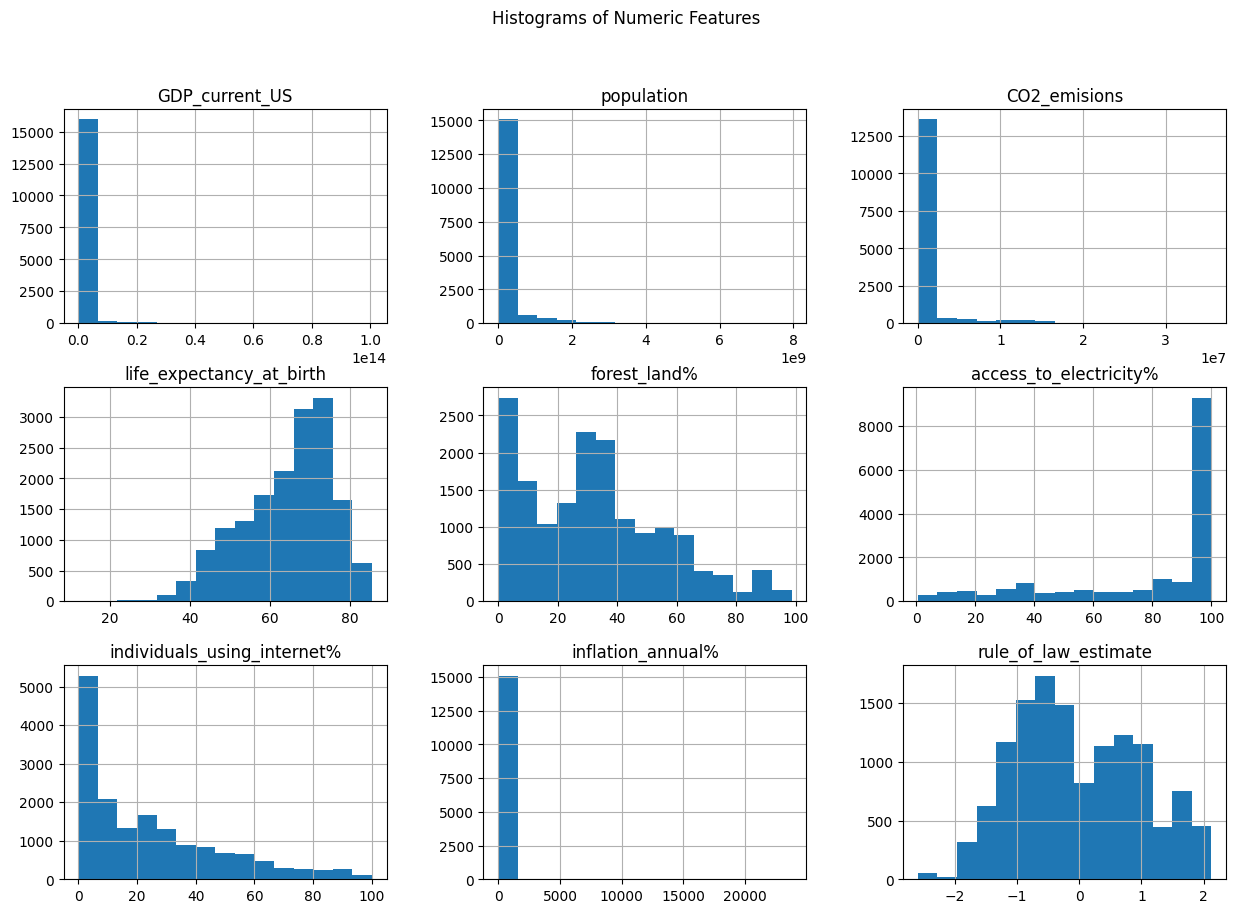

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each numeric feature
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols].hist(bins=15, figsize=(15, 10))
    plt.suptitle('Histograms of Numeric Features')
    plt.show()

plot_histograms(data)


#Box Plots

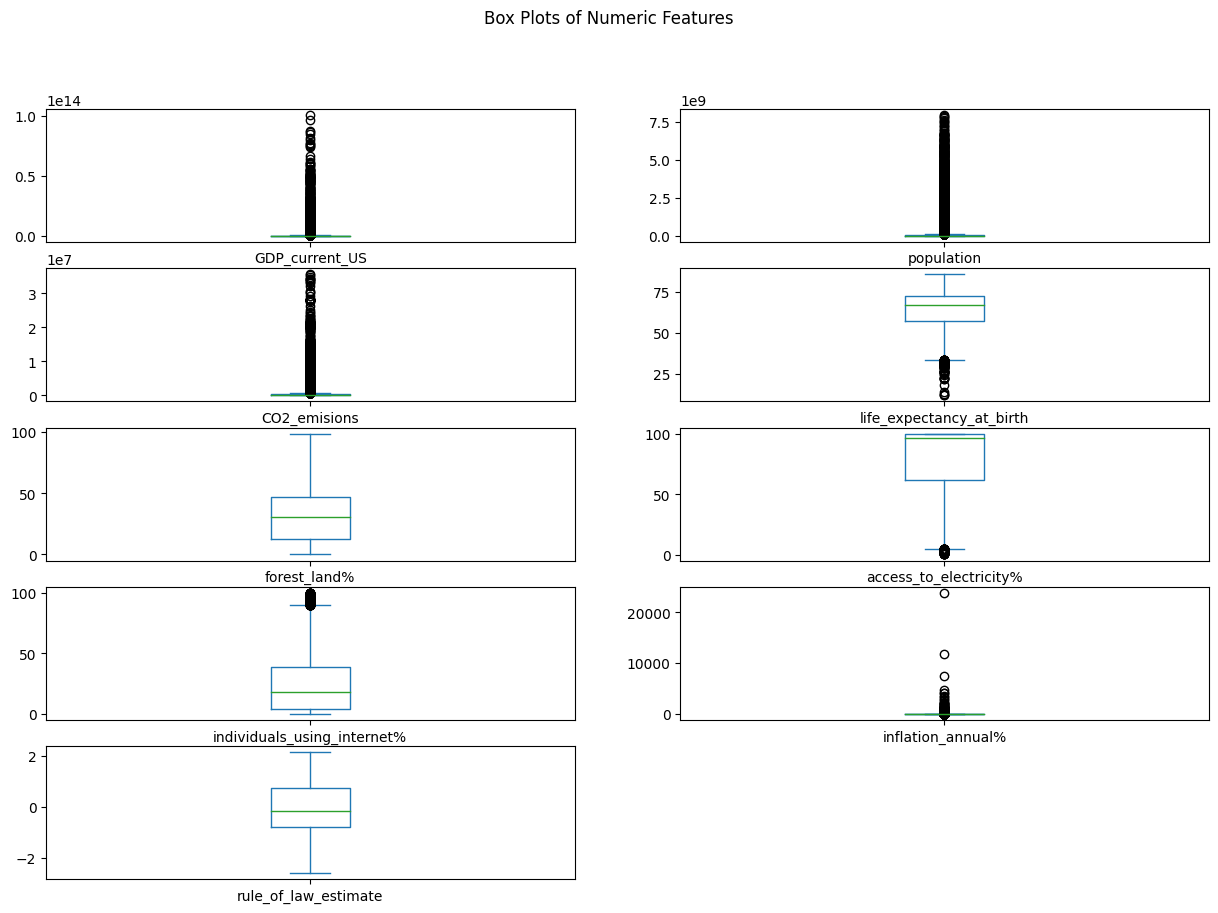

In [ ]:
# Box plots for numeric features
def plot_box_plots(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols].plot(kind='box', subplots=True, layout=(int(len(numeric_cols)/2)+1, 2), figsize=(15, 10), sharex=False, sharey=False)
    plt.suptitle('Box Plots of Numeric Features')
    plt.show()

plot_box_plots(data)


#Scatter Plots

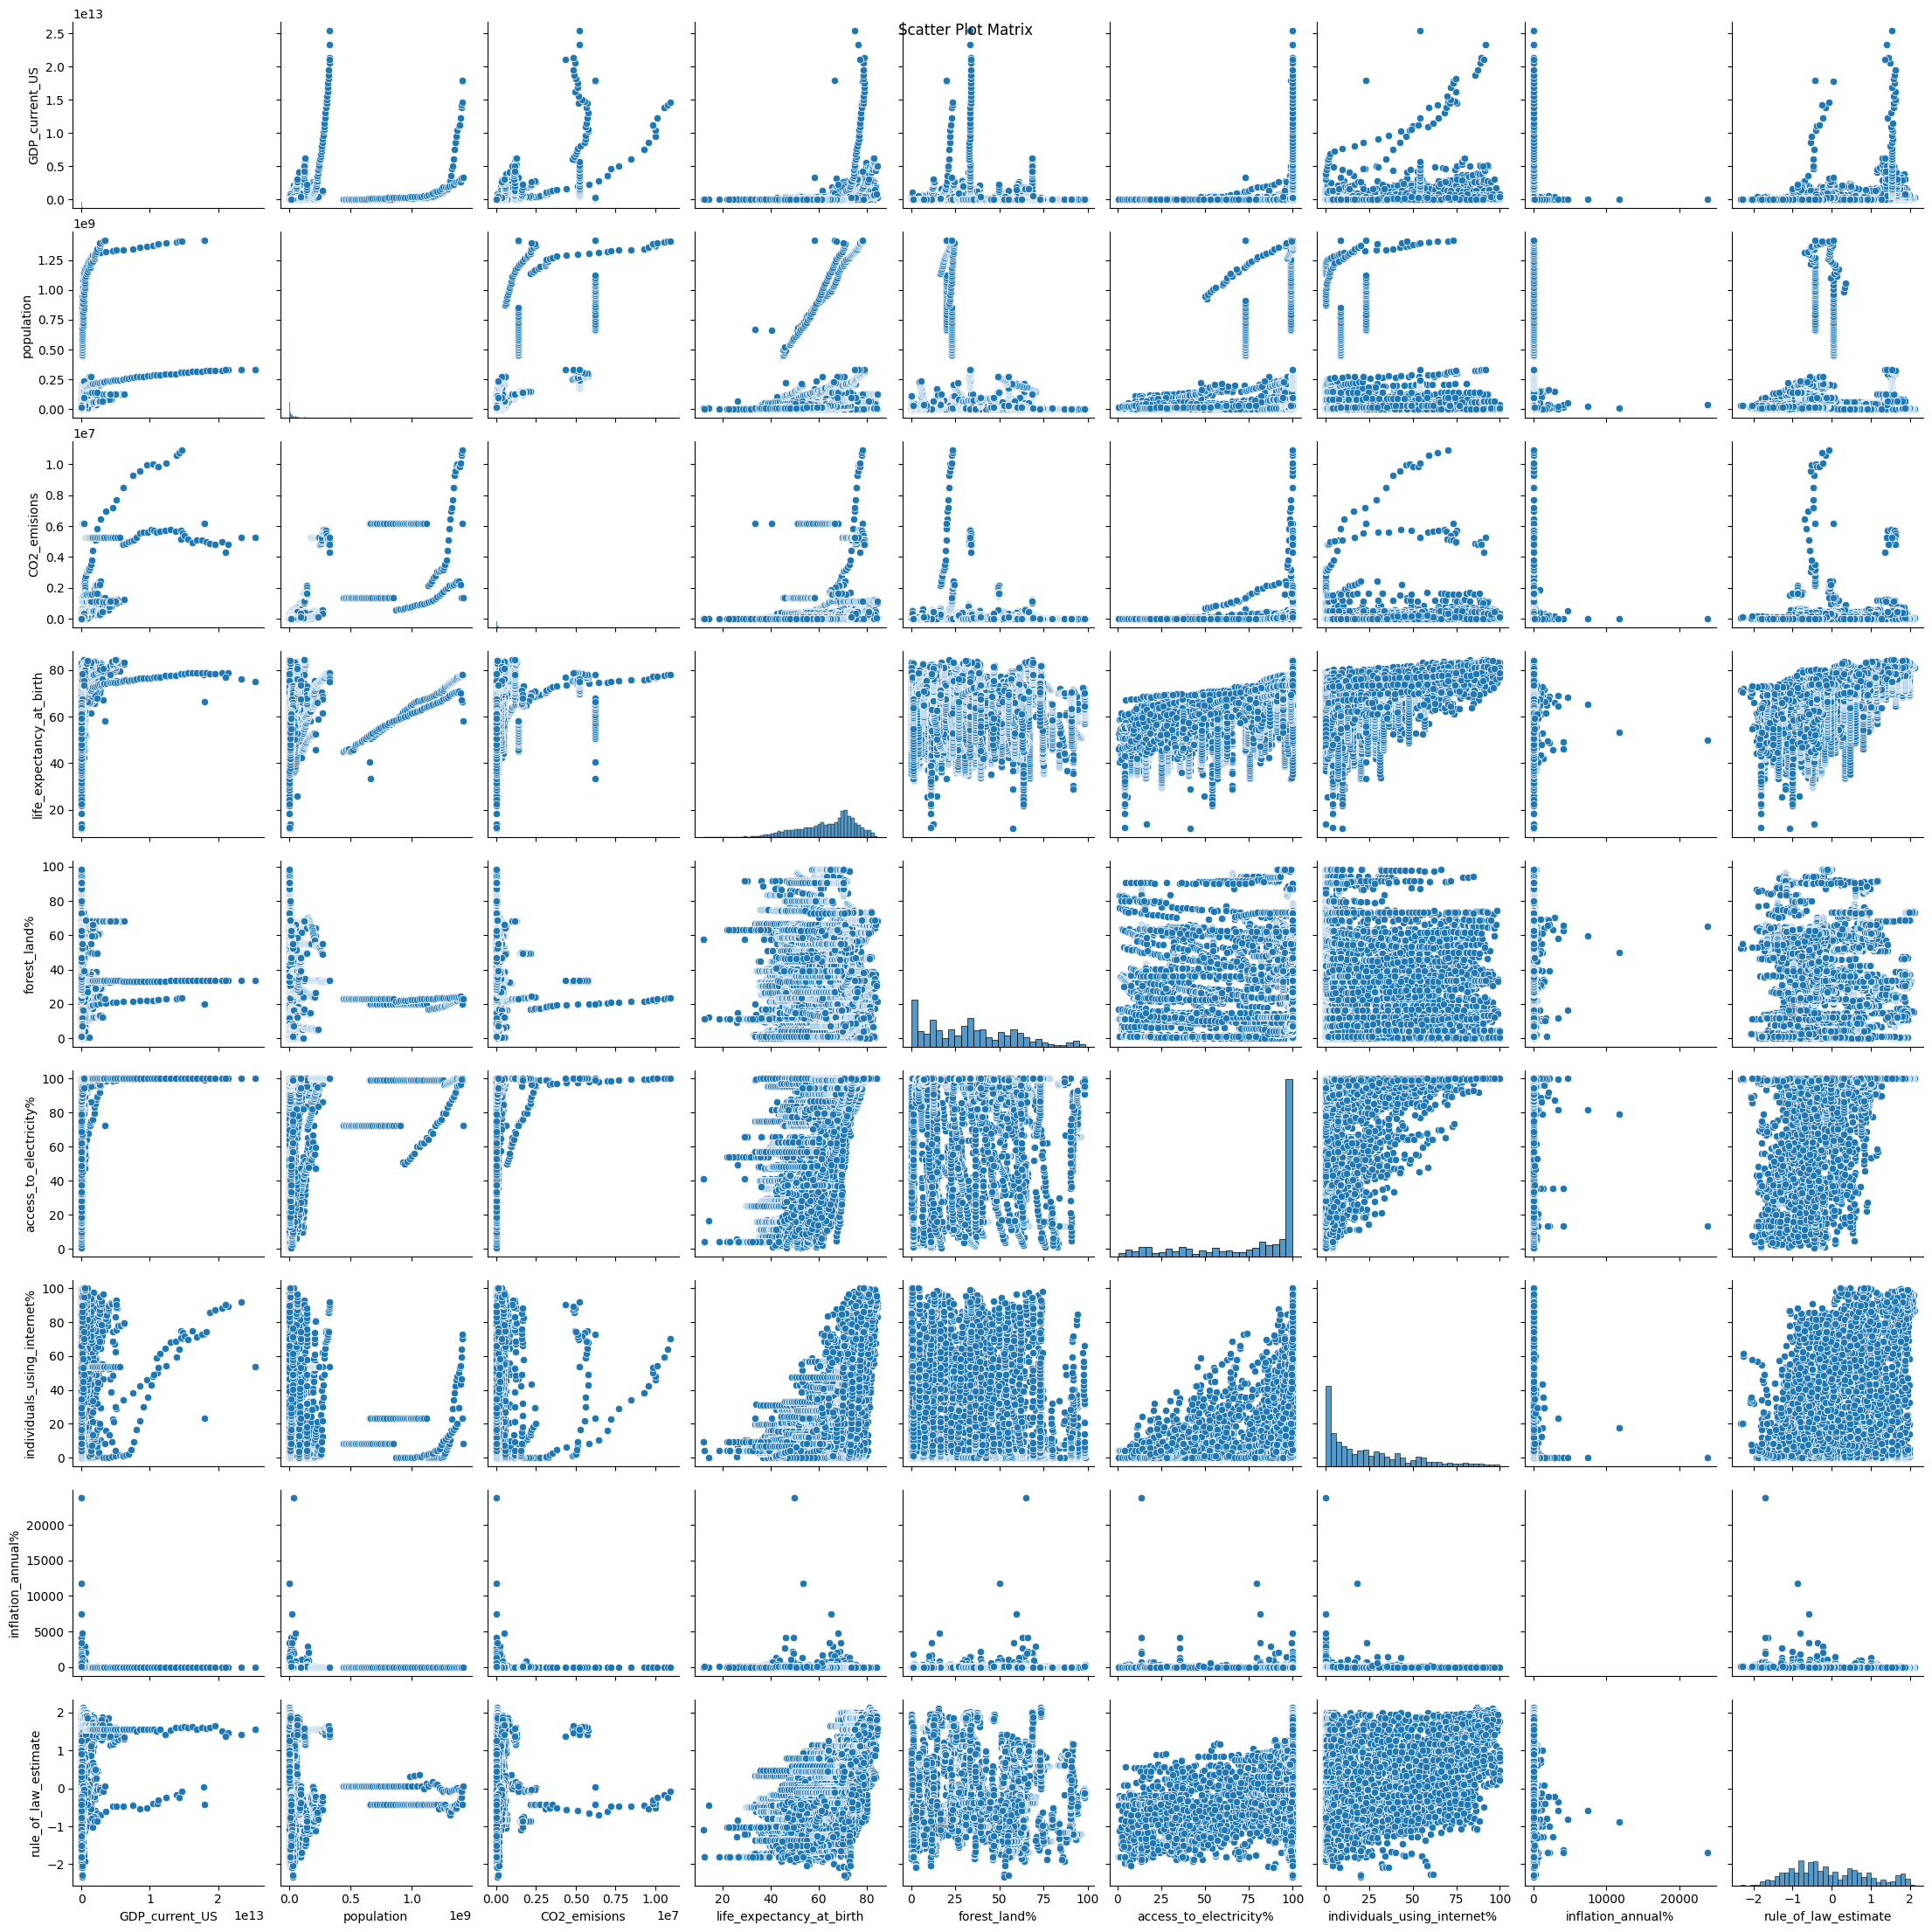

In [ ]:
# Scatter plot matrix
def plot_scatter_matrix(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    sns.pairplot(df[numeric_cols].dropna())
    plt.suptitle('Scatter Plot Matrix')
    plt.show()

plot_scatter_matrix(data)


#Correlation Heatmap

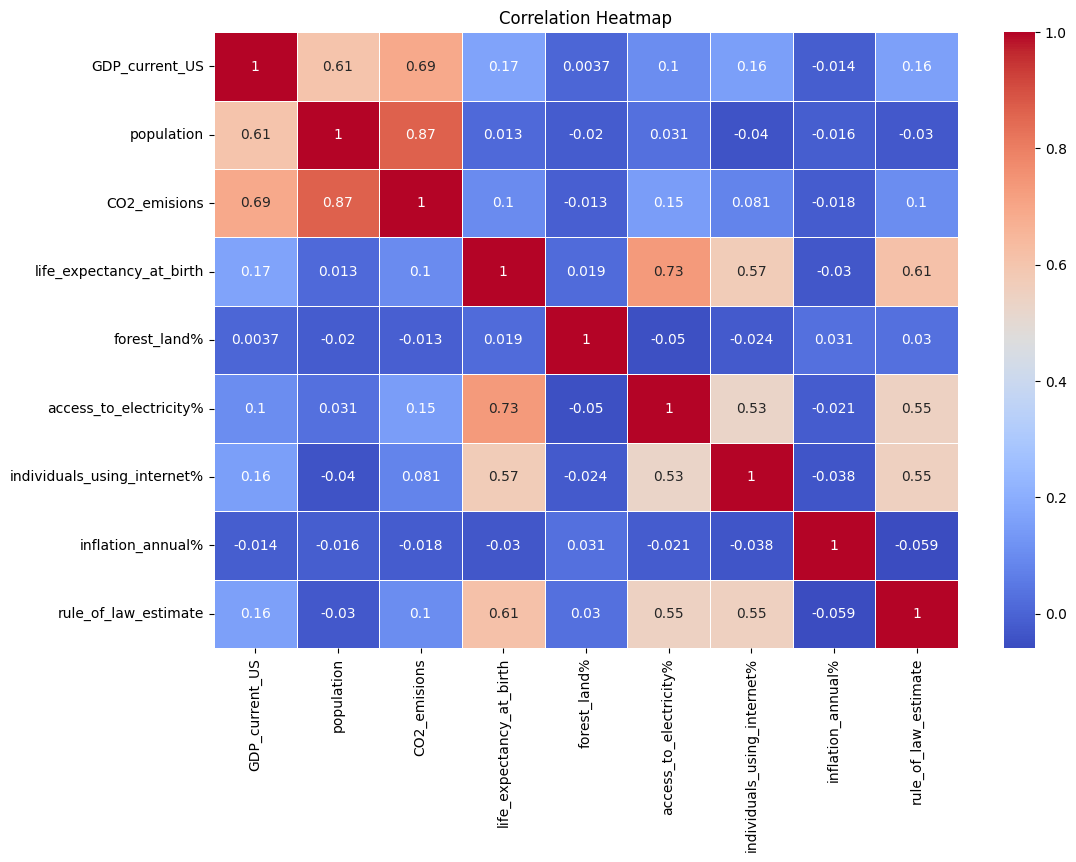

In [ ]:
# Correlation heatmap
def plot_correlation_heatmap(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data)


#Bar plots for categorical data

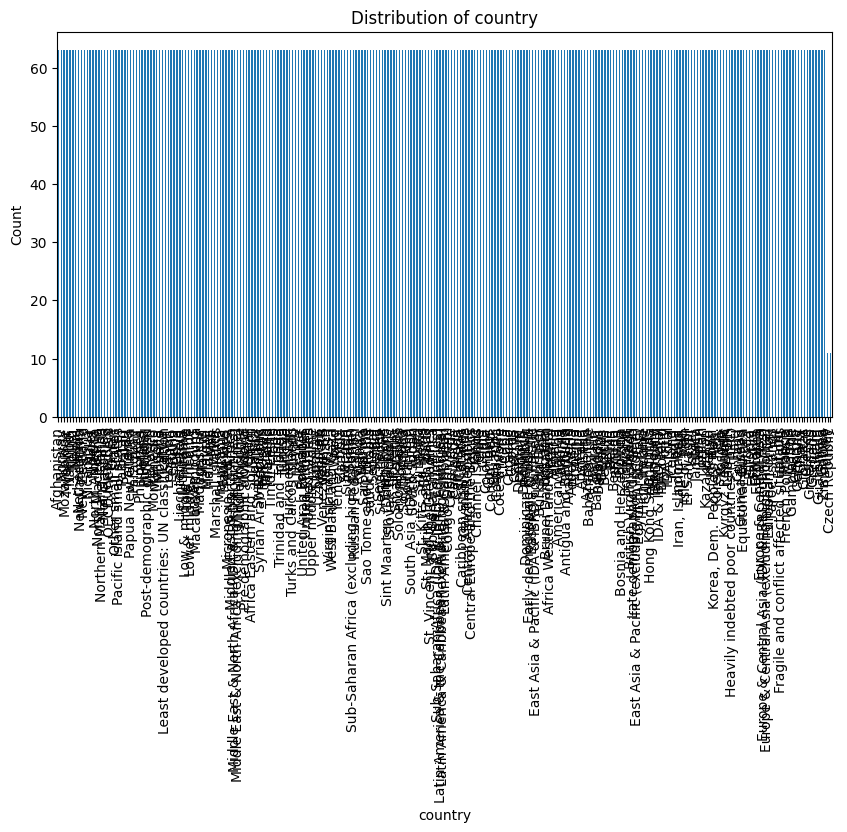

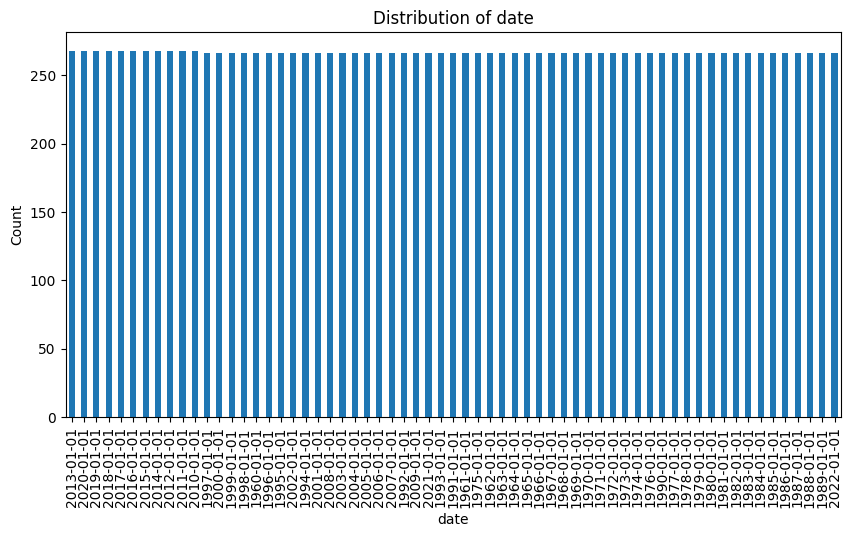

In [ ]:
# Bar plots for categorical data
def plot_bar_plots(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.show()

plot_bar_plots(data)


#Initial Findings

In [ ]:
# Initial Findings
def initial_findings(df):
    print("Initial Findings:")
    print("1. The dataset contains the following columns:", df.columns.tolist())
    print("2. The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")
    print("3. The columns with missing values are:", df.columns[df.isnull().any()].tolist())
    print("4. The numeric columns show varying ranges and distributions, some with significant skewness.")
    print("5. Correlation analysis shows which variables have strong relationships with each other.")
    print("6. Categorical columns and their unique values:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"   {col}: {df[col].nunique()} unique values")

initial_findings(data)


Initial Findings:
1. The dataset contains the following columns: ['country', 'date', 'GDP_current_US', 'population', 'CO2_emisions', 'life_expectancy_at_birth', 'forest_land%', 'access_to_electricity%', 'individuals_using_internet%', 'inflation_annual%', 'rule_of_law_estimate']
2. The dataset has 16780 rows and 11 columns.
3. The columns with missing values are: ['GDP_current_US', 'population', 'CO2_emisions', 'life_expectancy_at_birth', 'forest_land%', 'access_to_electricity%', 'individuals_using_internet%', 'inflation_annual%', 'rule_of_law_estimate']
4. The numeric columns show varying ranges and distributions, some with significant skewness.
5. Correlation analysis shows which variables have strong relationships with each other.
6. Categorical columns and their unique values:
   country: 268 unique values


#Phase 3

Data Preprosessing

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset again
file_path = '/content/drive/MyDrive/Colab Notebooks/world_bank_development_indicators.csv'
data = pd.read_csv(file_path)

# Columns to keep
selected_columns = [
    'country', 'date', 'GDP_current_US', 'population', 'CO2_emisions',
    'life_expectancy_at_birth', 'forest_land%', 'access_to_electricity%',
    'individuals_using_internet%', 'inflation_annual%', 'rule_of_law_estimate'
]

# Filter the dataset
data = data[selected_columns]

# Handle Missing Values by Imputing Mean of Each Country
def handle_missing_values(df, country_col):
    df_copy = df.copy()
    numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df_copy[col] = df_copy.groupby(country_col)[col].transform(lambda x: x.fillna(x.mean()))
    df_copy['date'] = pd.to_datetime(df_copy['date'])
    return df_copy

data = handle_missing_values(data, 'country')

# Remove Duplicates
data = data.drop_duplicates()

# Detect and Handle Outliers using IQR method as an alternative to Z-score
def remove_outliers_iqr(df):
    df_copy = df.copy()
    numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df_copy[col] >= (Q1 - 1.5 * IQR)) & (df_copy[col] <= (Q3 + 1.5 * IQR))
        df_copy = df_copy.loc[filter]
    return df_copy

data = remove_outliers_iqr(data)

# Check if DataFrame is empty after outlier removal
if data.empty:
    raise ValueError("DataFrame is empty after outlier removal. Inspect the data and adjust outlier handling.")

# Inspect data after outlier removal
print(f"Data shape after outlier removal: {data.shape}")

# Data Transformation
# Scaling numeric variables
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Encoding categorical variables
encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Verify the preprocessing steps
data_description(data)


Data shape after outlier removal: (7400, 11)
First 5 rows of the dataset:
   country       date  GDP_current_US  population  CO2_emisions  \
0        0 1960-01-01       -0.429872    0.501645     -0.411718   
1        0 1961-01-01       -0.429605    0.526787     -0.411718   
2        0 1962-01-01       -0.429659    0.553615     -0.411718   
3        0 1963-01-01       -0.424752    0.581868     -0.411718   
4        0 1964-01-01       -0.423579    0.611565     -0.411718   

   life_expectancy_at_birth  forest_land%  access_to_electricity%  \
0                 -2.675763     -1.266485                -0.49885   
1                 -2.627825     -1.266485                -0.49885   
2                 -2.584745     -1.266485                -0.49885   
3                 -2.542563     -1.266485                -0.49885   
4                 -2.499572     -1.266485                -0.49885   

   individuals_using_internet%  inflation_annual%  rule_of_law_estimate  
0                    -0.747976    

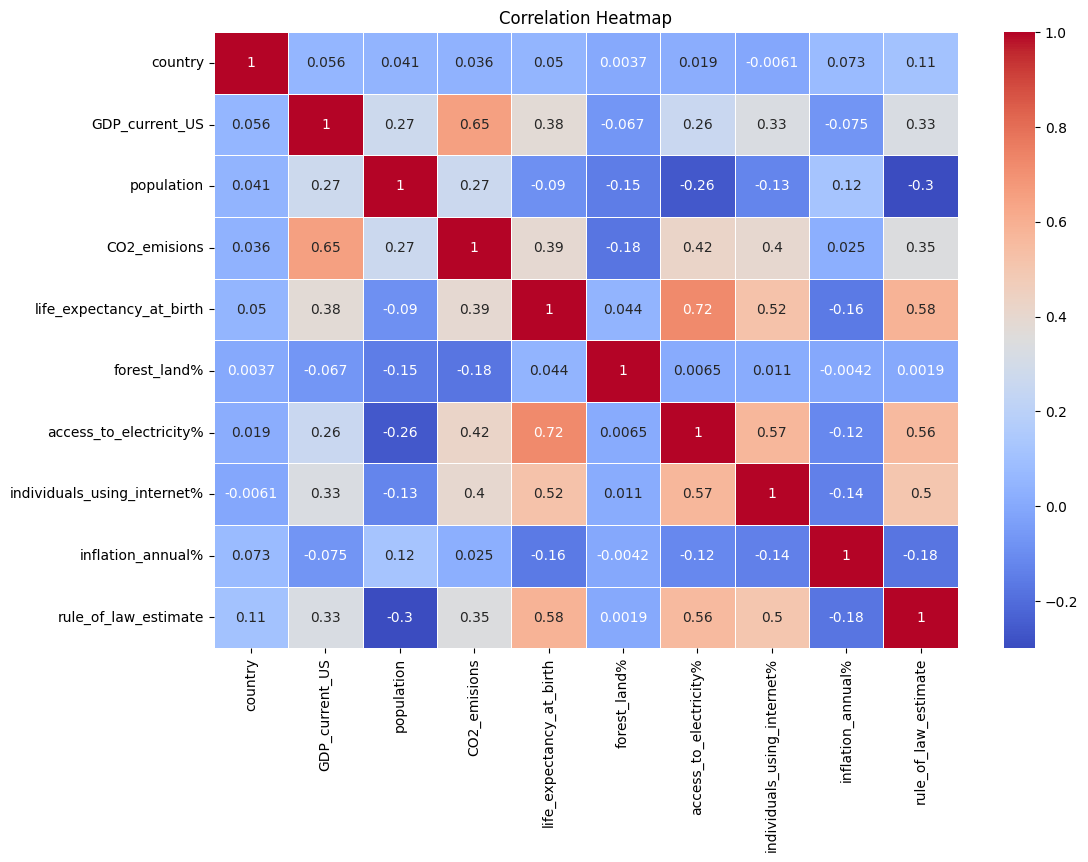

Significant correlations (absolute value >= 0.5):
GDP_current_US and CO2_emisions
life_expectancy_at_birth and access_to_electricity%
life_expectancy_at_birth and individuals_using_internet%
life_expectancy_at_birth and rule_of_law_estimate
access_to_electricity% and individuals_using_internet%
access_to_electricity% and rule_of_law_estimate
individuals_using_internet% and rule_of_law_estimate


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
def plot_correlation_heatmap(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data)

# Display significant correlations
def significant_correlations(df, threshold=0.5):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_cols].corr().abs()
    high_corr_var = np.where(correlation_matrix >= threshold)
    high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                     for x, y in zip(*high_corr_var)
                     if x != y and x < y]
    return high_corr_var

significant_corrs = significant_correlations(data)
print("Significant correlations (absolute value >= 0.5):")
for var1, var2 in significant_corrs:
    print(f"{var1} and {var2}")



#Phase 5

#Time Series

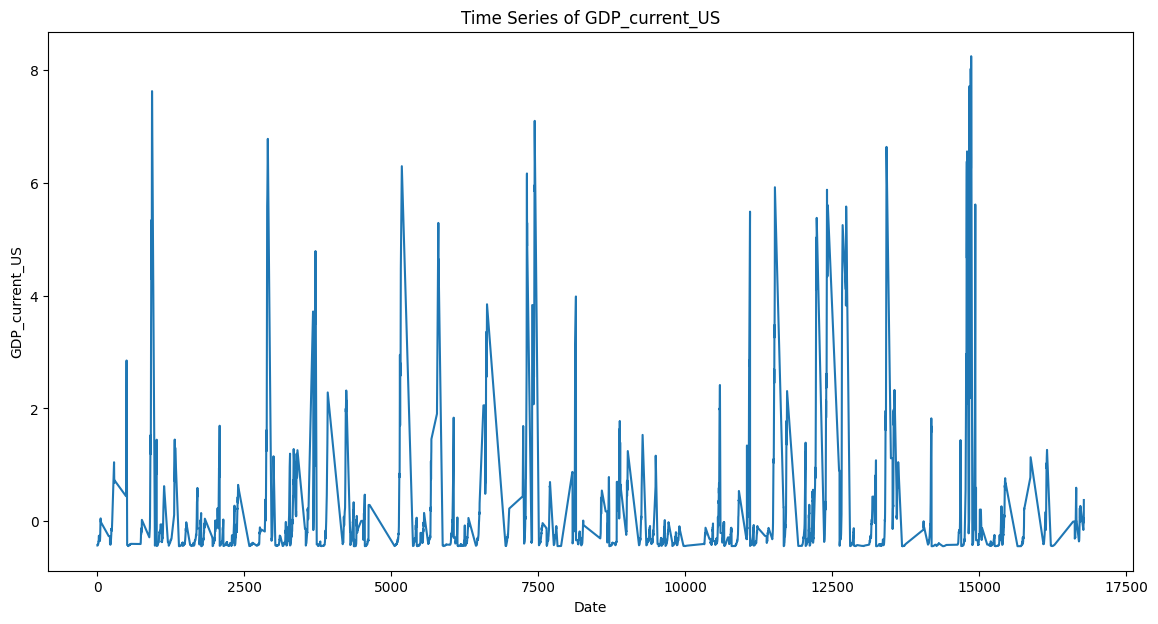

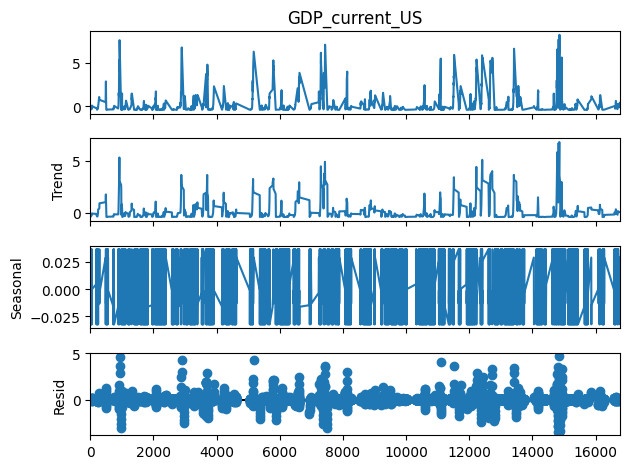

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


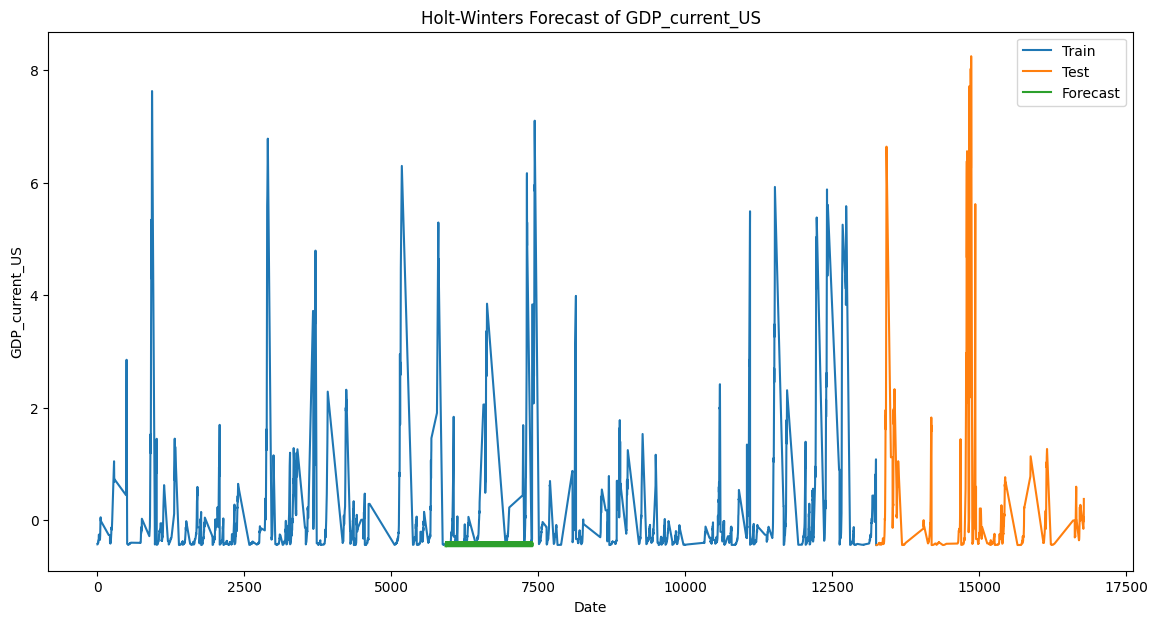

Mean Squared Error: 2.0159026715593895


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error



# Choose a variable for time series analysis
variable = 'GDP_current_US'

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(data[variable])
plt.title(f'Time Series of {variable}')
plt.xlabel('Date')
plt.ylabel(variable)
plt.show()

# Seasonal Decompose
result = seasonal_decompose(data[variable].dropna(), model='additive', period=12)
result.plot()
plt.show()

# Holt-Winters Exponential Smoothing
train_size = int(len(data) * 0.8)
train, test = data[variable].dropna()[:train_size], data[variable].dropna()[train_size:]

model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
pred = model.forecast(len(test))

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Forecast')
plt.title(f'Holt-Winters Forecast of {variable}')
plt.xlabel('Date')
plt.ylabel(variable)
plt.legend()
plt.show()

# Evaluate the forecast
mse = mean_squared_error(test, pred)
print(f'Mean Squared Error: {mse}')


#Phase 6

#Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Define features and target variable
X = data.drop('GDP_current_US', axis=1)
y = data['GDP_current_US']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Drop datetime columns from features
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)


# Apply Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.5384596389273835
R^2 Score: 0.5147735544089932


#Classiication

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example: Creating a binary classification target
data['target'] = (data['GDP_current_US'] > data['GDP_current_US'].median()).astype(int)

# Define features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Encode categorical variables if any
# Assuming all are already encoded

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Drop datetime columns from features
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)


# Apply Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.9993243243243243
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       745
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1480
   macro avg       1.00      1.00      1.00      1480
weighted avg       1.00      1.00      1.00      1480



#Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


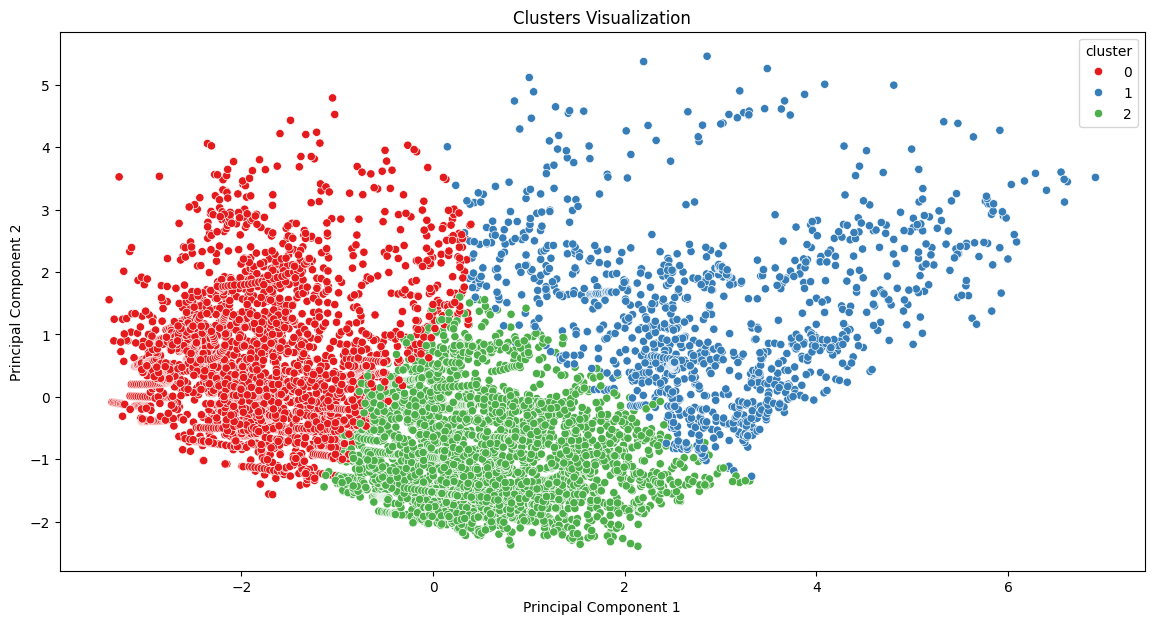

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# Define features for clustering
X = data.drop('country', axis=1)


# Drop datetime columns from features
X = X.drop(['date'], axis=1)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the data
data['cluster'] = clusters

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
data['pc1'] = principal_components[:, 0]
data['pc2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=data, palette='Set1')
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
